# Machine Learning
---

## IMD0104 - Aprendizado de máquina
### Professor Dr. João Carlos
### Team
- Marco Olimpio - marco.olimpio at gmail.com
- Rebecca Betwel - bekbetwel at gmail.com

---

### First, lets configure the notebook and load the dataset

#### Configuring the environment

In [81]:
!pip install cufflinks

Downloading/unpacking cufflinks
  Cannot fetch index base URL https://pypi.python.org/simple/
  Could not find any downloads that satisfy the requirement cufflinks
Cleaning up...
No distributions at all found for cufflinks
Storing debug log for failure in /Users/marco/Library/Logs/pip.log


In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
#import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

ModuleNotFoundError: No module named 'cufflinks'

#### Loading the dataset for the assignment

The dataset was publicezed in a comma separeted value format, so utilizing the function read_csv we could load the dataset!
Below we have a sample of the original data, ten tuples.

In [164]:
df = pd.read_csv('./db/googleplaystore.csv')

So, according to the description of the dataset as well as the descriptions of the columns we do have a dataset with informtion about the Google Play Store, we could apply many algorithms since we do have a great variaty of tuples, more than 10k, and 13 features.

# 1. Introduction 

Our consulting firm has received a request to discover the most probable kind of mobile app that our client should concentrate efforts to maximize the return on investment. As the first glimpse, we considered the data from Google Play platform to make this study where were considered the lower break in point in terms of mobile products. 

Therefore, we have acquired a very unique dataset with more than ten thousand instances and more than ten features from Google Store Platform to make the analysis of the next killer app.


## 1.1 The dataset

The dataset is a collection of Google Play Store and there is a good variaty of information about number of installations, the genre of the application, the reviews and other features making 13 features total and we do have about eleven thousand information of apps from the mobile platform.

So, now, lets embrance what data we do have in the data set, lets take a sample below:

In [165]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
133,Dresses Ideas & Fashions +3000,BEAUTY,4.5,473,8.2M,"100,000+",Free,0,Mature 17+,Beauty,"March 1, 2017",1.0.2.0,1.6 and up
10050,Advanced EX for NISSAN,TOOLS,2.9,164,144k,"5,000+",Paid,$4.99,Everyone,Tools,"March 14, 2015",1.3,1.6 and up
4941,ac remote control,TOOLS,3.7,9514,7.0M,"500,000+",Free,0,Everyone,Tools,"July 11, 2018",acremotecontrol-v7,4.0.3 and up
6527,BN Pro Battery Level-White,LIBRARIES_AND_DEMO,NaN,21,200k,"5,000+",Free,0,Everyone,Libraries & Demo,"February 5, 2017",2.3.2,1.6 and up
4986,Alchemy Classic Ad Free,FAMILY,4.6,20178,9.0M,"100,000+",Free,0,Everyone,Puzzle,"May 26, 2014",1.7.3,1.6 and up
2343,Migraine Buddy - The Migraine and Headache tra...,MEDICAL,4.7,26862,30M,"500,000+",Free,0,Everyone,Medical,"June 25, 2018",25.3.1,4.0.3 and up
3445,ai.type Free Emoji Keyboard,PERSONALIZATION,4.3,647844,Varies with device,"10,000,000+",Free,0,Everyone,Personalization,"July 24, 2018",Varies with device,Varies with device
5930,Let's Learn Alif Ba Ta,FAMILY,4.6,32,60M,"10,000+",Free,0,Everyone,Education,"November 29, 2017",6,4.0.3 and up
5862,Miami crime simulator,GAME,4.0,254518,100M,"10,000,000+",Free,0,Mature 17+,Action,"July 9, 2018",2.0,4.0 and up
3185,Fly Delta,TRAVEL_AND_LOCAL,3.7,27560,46M,"5,000,000+",Free,0,Everyone,Travel & Local,"July 31, 2018",4.13.2,5.0 and up


we could check that our dataset presents 10.841 tuples


In [166]:
len(df)

10841

and 13 columns/features

In [167]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Where each column/feature represents:
- App - The name of the application
- Category - The category of the application
- Rating - The rate given by the users
- Reviews - The number of reviews given by the users
- Size - The size of the application
- Installs - Number of installs
- Type - If the application is paid or free
- Price - The price charged
- Content Rating - The age rating
- Genres - The kind of category of the application
- Last updated - The date when it was last updated
- Current ver - The current version number, the last version number
- Android ver - The minimun android compatible version

Now lets see what each dataset feature presents in terms of its data, like the range of the data, the categories it has and etc.

## 1.2 Data exploration

### 1.2.1 Pre-processing

In this section we try to adjust de data from our dataset. Why do we need to do that? Because with bad data we could not get good results, simple as that. 

So what do we need to do? First step to proceed is to:
- remove all missing data; 
- check for outliers; and 
- normalize our data

All these steps are following the assignment description.

But we need to put some more effort to this dataset, like
- removing duplicate tuples/instances, in this case, duplicate apps
- check for strange data, for instance the Installs feature should only appear with 'Free' or 'Paid'
- check Android version to be a valid number
- convert size for MB
- remove strange caracters
- cast data to the appropriate data type ,eg. string to int;


In [168]:
df.drop_duplicates(subset='App', inplace=True)

df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']

df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

So, analysing the number of 'missing' data we have

In [169]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1463,0.151465
Size,1227,0.127032
Current Ver,8,0.000828
Android Ver,2,0.000207
Type,1,0.000104
Last Updated,0,0.000000


And we need to take action about this situation droping all instances with missing values from our dataset

In [170]:
df.dropna(how ='any', inplace = True)

Checking the result of this operation we conclude with less number of instances:

In [171]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


In [172]:
print(len(df))

7021


#### Fiding
Now we have only 7021 instances, or, a reduction of about:

In [173]:
10841 - 7021

3820

In [174]:
df["Price"].describe()

count    7021.000000
mean        1.174222
std        18.205355
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

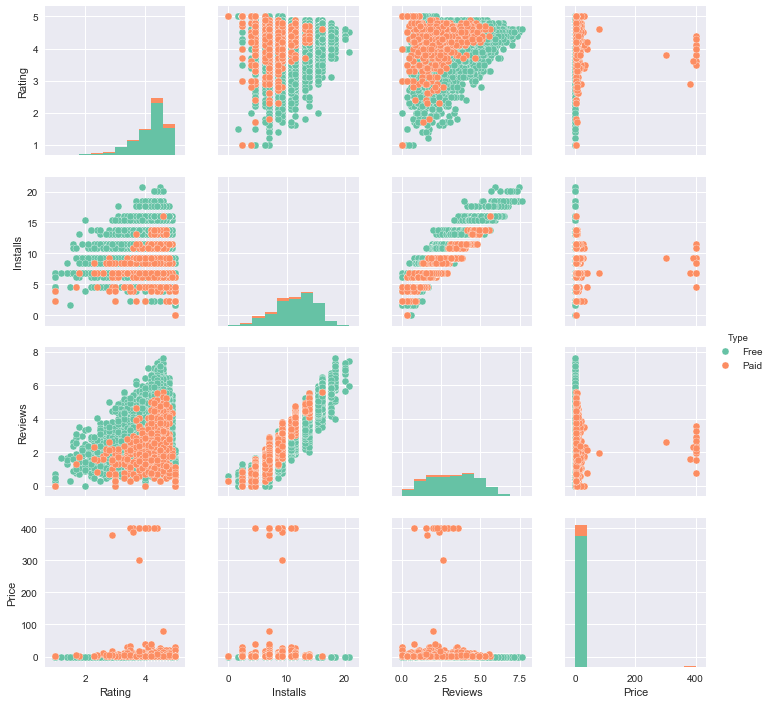

In [175]:
x = df['Rating'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

In [74]:
print("\n", df['Category'].unique())


 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [176]:
print(df["Genres"].unique())

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education'
 'Education;Creativity' 'Education;Education'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Brain Games'
 'Entertainment;Music & Video' 'Events' 'Finance' 'Food & Drink'
 'Health & Fitness' 'House & Home' 'Libraries & Demo' 'Lifestyle'
 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure' 'Arcade' 'Casual'
 'Card' 'Casual;Pretend Play' 'Strategy' 'Action' 'Puzzle' 'Sports' 'Word'
 'Racing' 'Casual;Creativity' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educational;Education'
 'Educational;Brain Games' 'Educational;Pretend Play'
 'Casual;Action & Adventure' 'Ent

The feature 'Price' is one of columns that need some normalization. As we can see below, we have a mean of $1,17 per app and the data is very skewed. Below we plotted a chart with the distribution of this

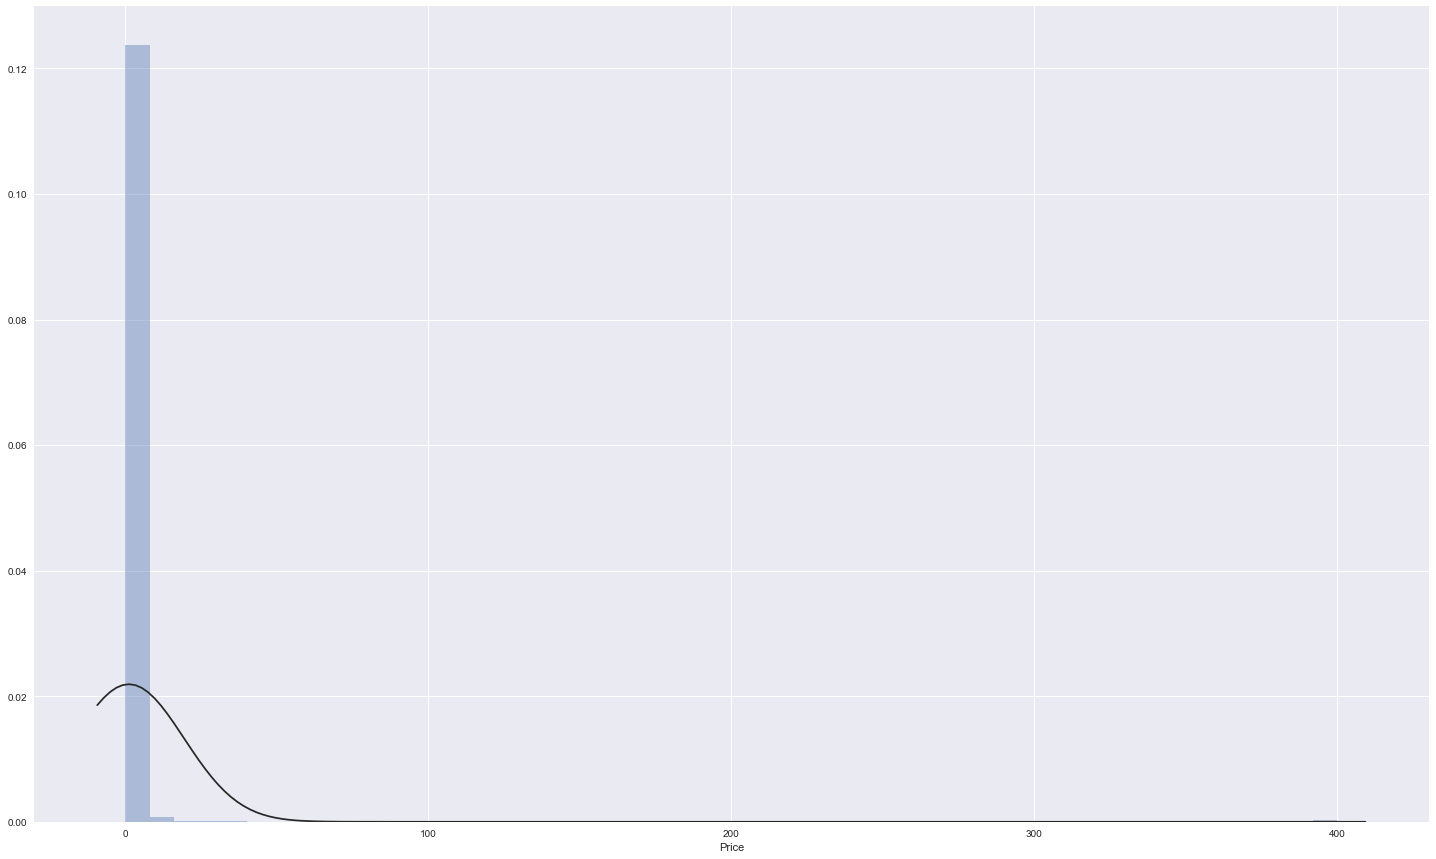

In [177]:
from scipy import stats
sns.distplot(df["Price"], kde=False, fit=stats.norm);

In [89]:
df["Price"].describe()

count    7021.000000
mean        1.174222
std        18.205355
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [178]:
dfmod = df
dfmod["Price"] = (df["Price"] - df["Price"].min()) / (df["Price"].max() - df["Price"].min())

In [179]:
dfmod["Price"].describe()

count    7021.000000
mean        0.002936
std         0.045513
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Price, dtype: float64

So as we can see below we now have a normalized data for price in another DataFrame following the same histogram. As Price there are another informations that we need to check like the number of installs, rating, reviews and size.

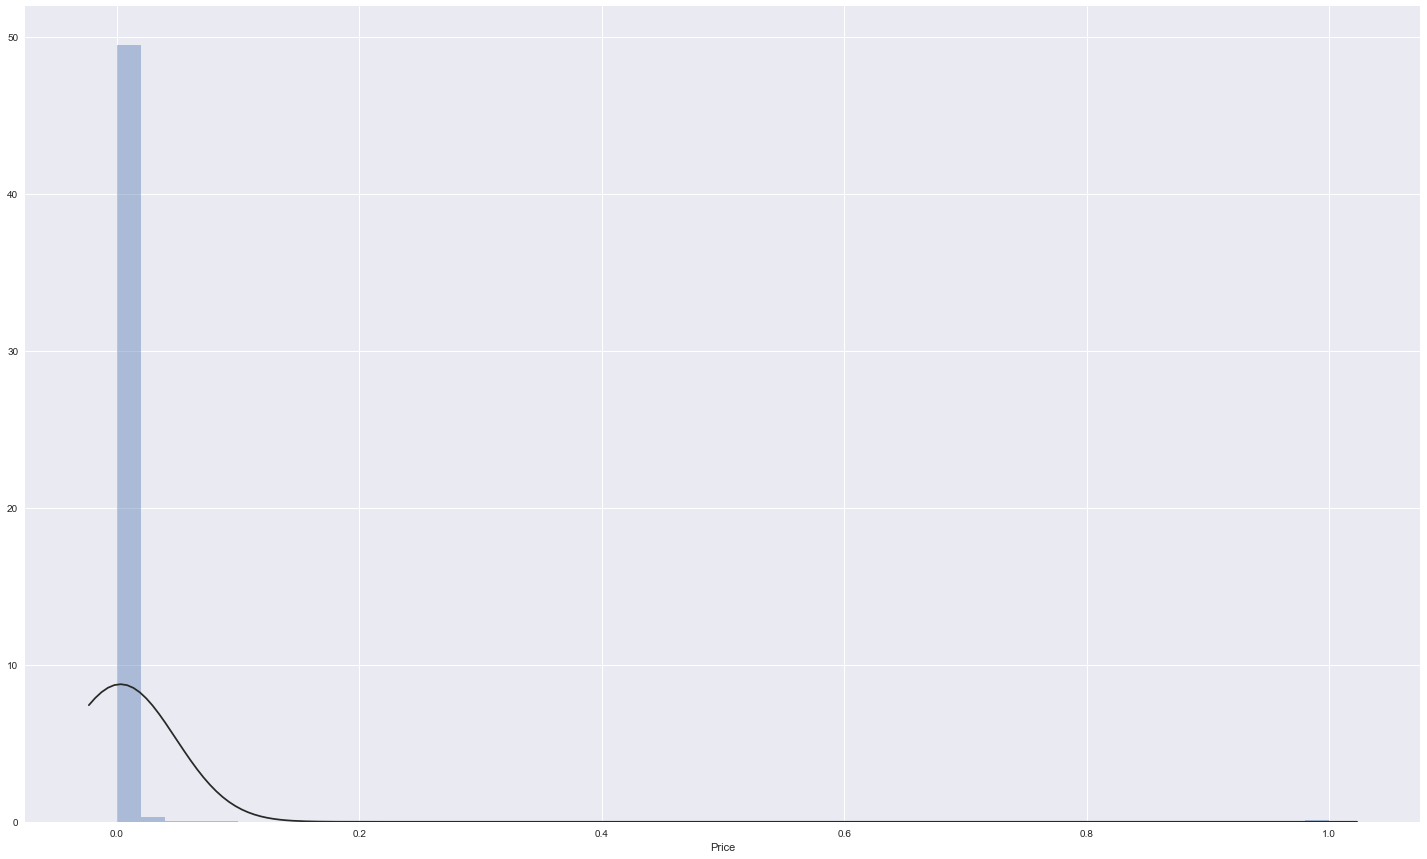

In [180]:
sns.distplot(dfmod["Price"], kde=False, fit=stats.norm);

About the information of 'Installs' we have a categorized information, dividing the number of dowloads in chunks as we can notice below

In [181]:
%%capture
dfmod["Installs"] = (df["Installs"] - df["Installs"].min()) / (df["Installs"].max() - df["Installs"].min())

Let's see how the distribution of the rating values is presented. So, we do have a mean really high of 4.16 in ratings' data and a standart deviantion of around 0.56. Notice that the minimun note is 1 and that the the first quartil is about 4 in ratings, in other words, we do have a skewed data with a long left long tail. We aready normalized this feature.

count    7021.000000
mean        4.160704
std         0.559241
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


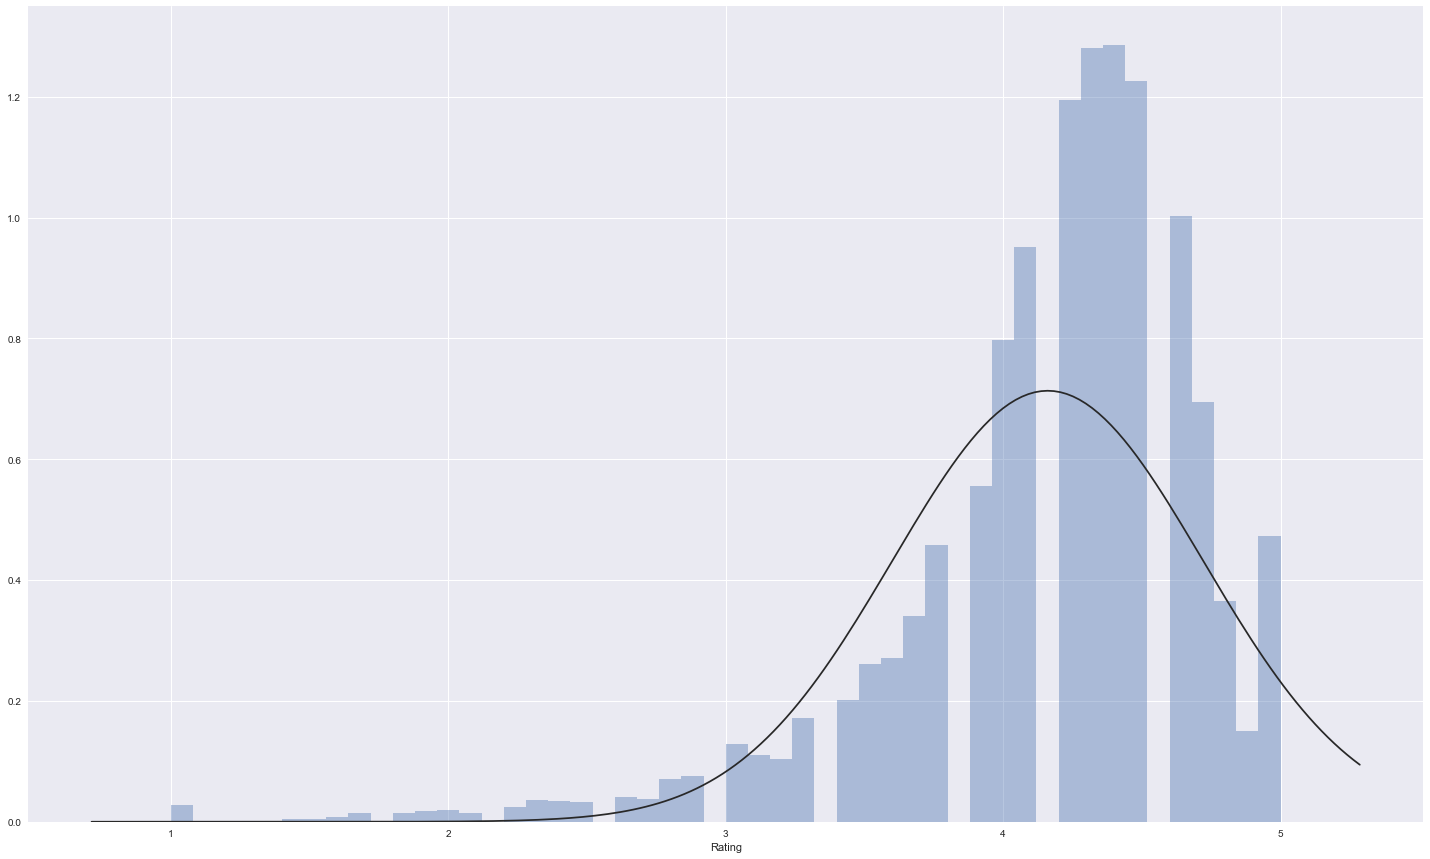

In [182]:
print(dfmod["Rating"].describe())

sns.distplot(df["Rating"], kde=False, fit=stats.norm);

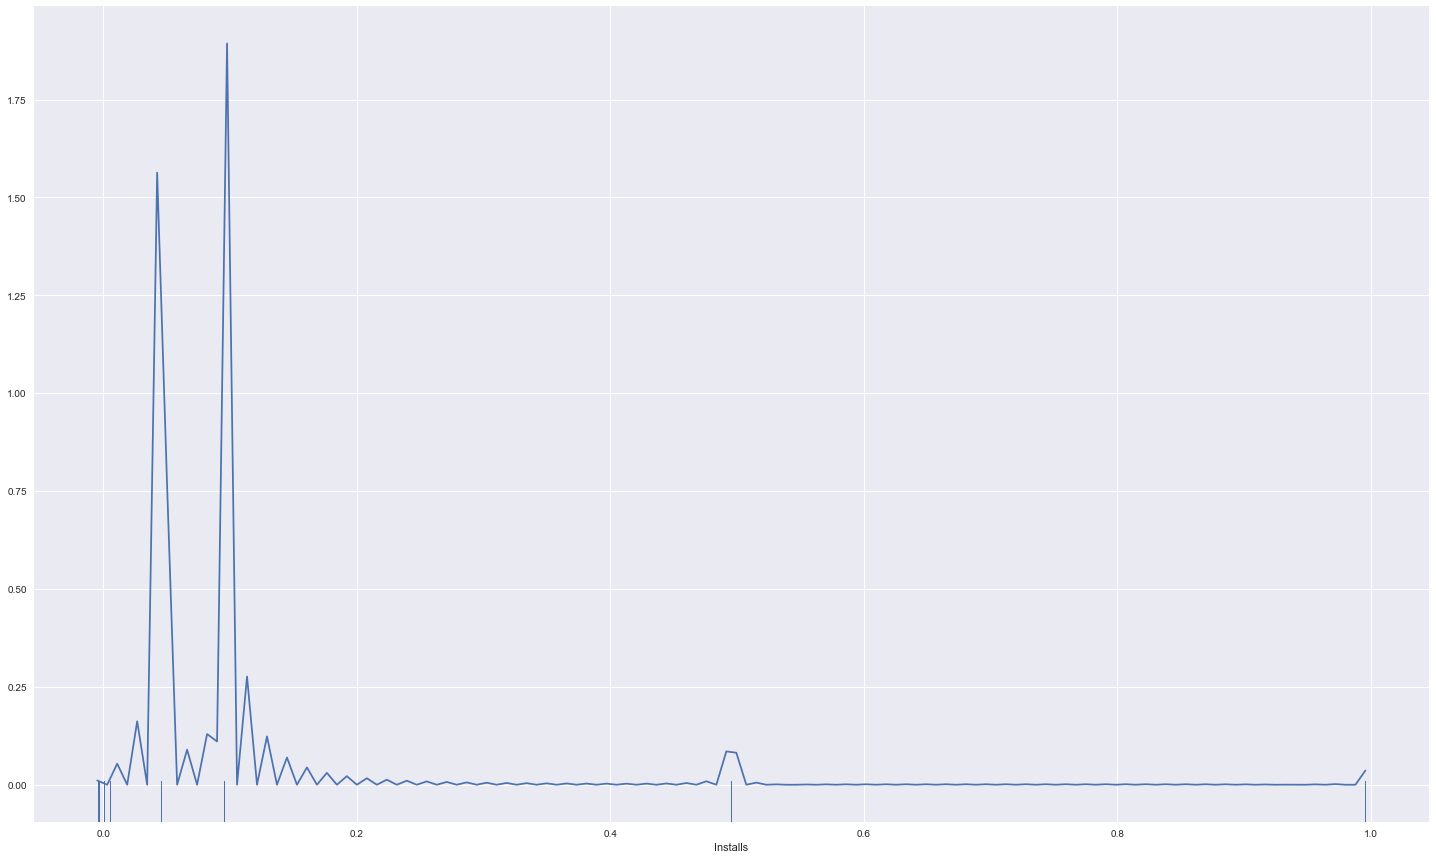

In [158]:
sns.distplot(df["Installs"], rug=True, hist=False)

If we going to utilize the method for classification we should classify based in a label. For this purpose, we will consider, based in the distribution of the rating. 
So, we'll propose the following


count    7021.000000
mean        4.160704
std         0.559241
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

 [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  4.   4.8  4.9  3.6  3.7  3.2
  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.   2.9  2.3  2.2
  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2]
['0 bad' '1 normal' '2 good']


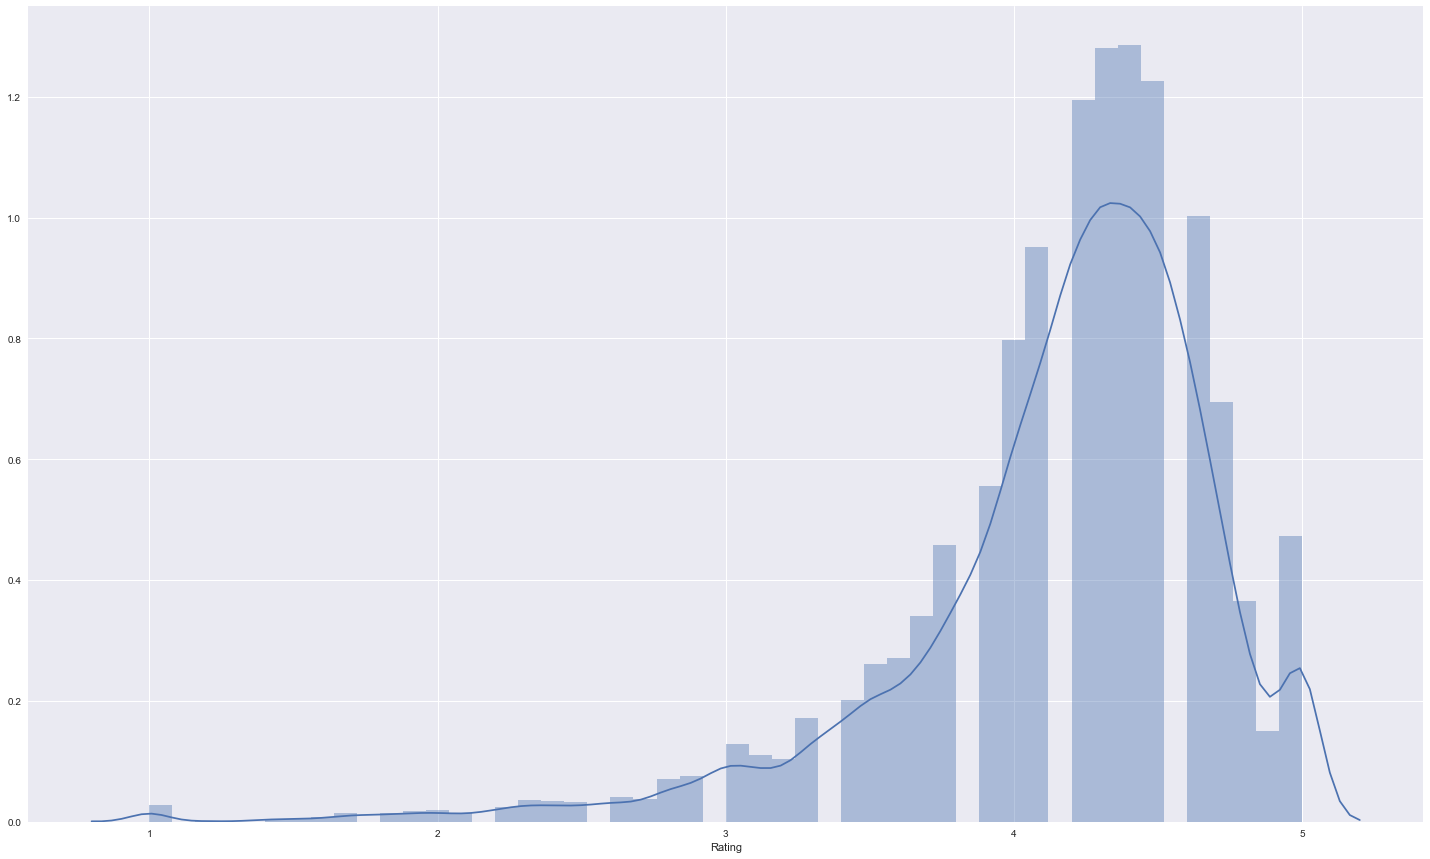

In [183]:
print(df["Rating"].describe())
print("\n", df['Rating'].unique())
sns.distplot(df["Rating"], hist=True)

dfmod.loc[(dfmod['Rating'] >= 0.0 ) & (dfmod['Rating'] <= 4.25 ), 'label_rating']   = '0 bad'
dfmod.loc[(dfmod['Rating'] > 4.25 ) & (dfmod['Rating'] <= 4.75 ), 'label_rating']   = '1 normal'
dfmod.loc[(dfmod['Rating'] > 4.75), 'label_rating']  = '2 good'
print(dfmod['label_rating'].unique())

Now it's after we categorize the new label, we a ready to normalize the data from rating. Remembering that we are normalizing the data from 0-1.

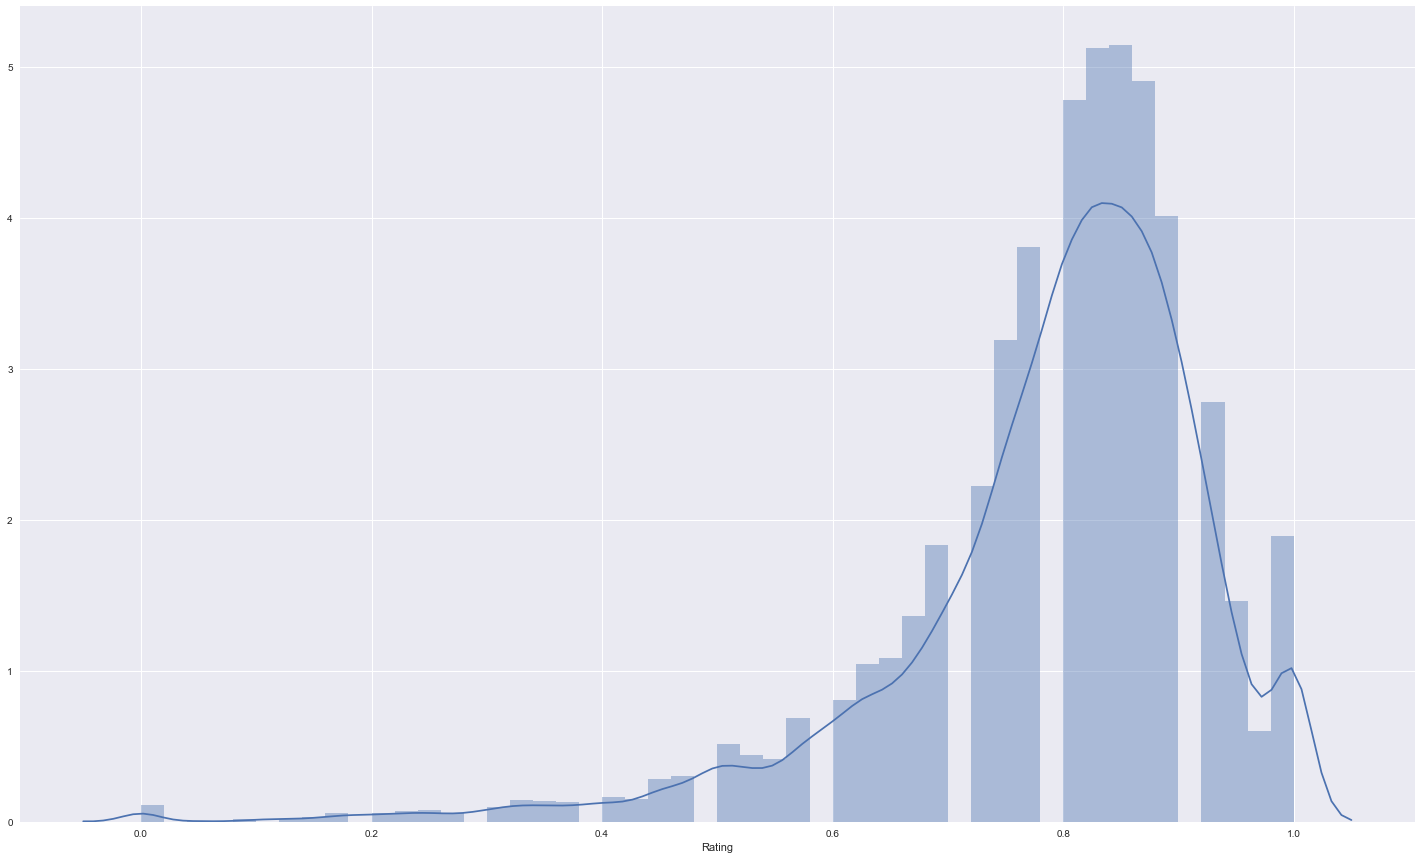

In [185]:
dfmod["Rating"] = (df["Rating"] - df["Rating"].min()) / (df["Rating"].max() - df["Rating"].min())
sns.distplot(dfmod["Rating"], hist=True)

We should also normalize reviews and price data

In [192]:
dfmod["Installs"] = (df["Installs"] - df["Installs"].min()) / (df["Installs"].max() - df["Installs"].min())
dfmod["Price"] = (df["Price"] - df["Price"].min()) / (df["Price"].max() - df["Price"].min())
dfmod["Reviews"] = (df["Reviews"] - df["Reviews"].min()) / (df["Reviews"].max() - df["Reviews"].min())

dfmod[['Rating', 'Installs', 'Price', 'Reviews', 'label_rating' ]]

,Rating,Installs,Price,Reviews,label_rating
0,0.775,9.999000e-06,0.0,3.519580e-06,0 bad
1,0.725,4.999990e-04,0.0,2.151844e-05,0 bad
2,0.925,4.999999e-03,0.0,1.949335e-03,1 normal
3,0.875,5.000000e-02,0.0,4.803625e-03,1 normal
4,0.825,9.999900e-05,0.0,2.151844e-05,1 normal
5,0.850,4.999900e-05,0.0,3.697786e-06,1 normal
6,0.700,4.999900e-05,0.0,3.942820e-06,0 bad
7,0.775,9.999990e-04,0.0,8.200621e-04,0 bad
8,0.850,9.999990e-04,0.0,3.071836e-04,1 normal
9,0.925,9.999000e-06,0.0,2.673099e-06,1 normal


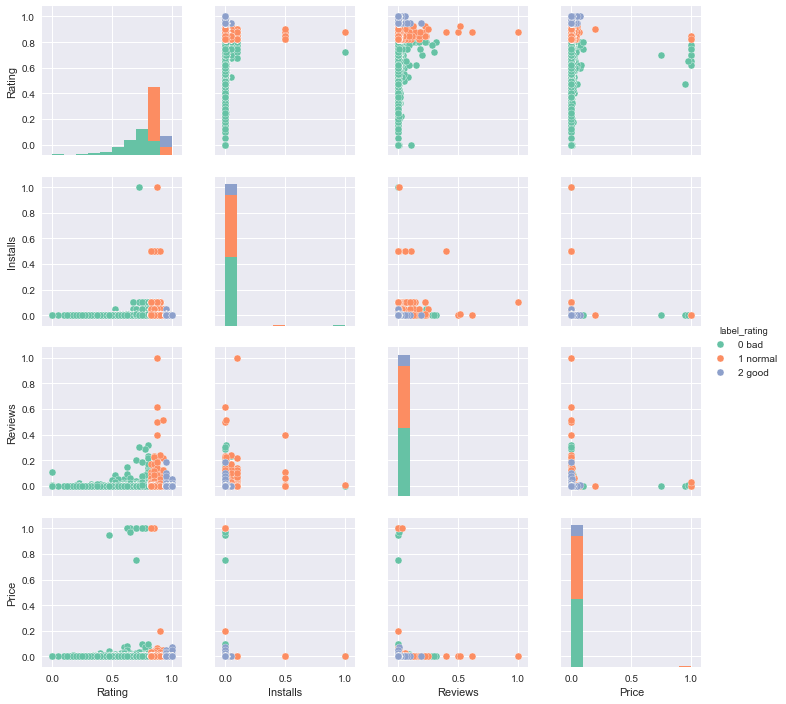

In [198]:
#sns.dfmod[['Rating', 'Installs', 'Price', 'Reviews', 'label_rating' ]]

#sns.pairplot(data = dfmod[['Rating', 'Installs', 'Price', 'Reviews', 'label_rating' ]])

x = dfmod['Rating']
z = dfmod['Installs']
p = dfmod['Reviews'][df.Reviews!=0].dropna()
t = dfmod['label_rating'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, z, p, t, price)), 
                        columns=['Rating', 'Installs', 'Reviews', 'label_rating', 'Price']), hue='label_rating', palette="Set2")

What this pair plot above shows us is how the mobile market works. The first only plot that we noticed was the $rating x install$ chart. In this chart we can notice that the highest ratings received are way less the number of installs, that same behavior can be observed with the $rating x reviews$ the third observation is over the $rating x price$ chart, in this chat we can conclude that **there is no 'good' software with high rating!**

Observing the second row, third and fourth columns, we can see that the number of reviews is way low, it doesn't matter if its bad, normal or good and it also indicates a poor correlation between these two features. The $installs x price$ chart shows that there is no good paid app with a high number of installs and that there is normal and bad software way abobe the mean of price in the google play store

In [200]:
sns.heatmap(dfmod.dropna(how='any'), annot=True, fmt=".1f")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# 2.Processing

As we are talking about a descriptive database we are going to explore non supervisioned methods in this section. Notably the k-means algorithm.

As proposed in the assignment description, we should consider a k for minimum of two and maximun of $log_2{n}$, where $n$ is the number of intances that we've in our dataset.

So, after all the pre-processing section we ended up with around 7k instances, it'll give us aproximately $log_2{7000} = 12.7731392067$ and we could round up this number to consider 18 as the number of $k's$ that we could ues in ours experimentations.

So, making use of scikit-learn library we could code the experimentation with k-means method using:

In [249]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn import preprocessing, metrics
from sklearn.cluster import AgglomerativeClustering
from time import time

The k-Means algorithm coded in scikit-learn utilizes the Lloyd’s or Elkan’s algorithm [http://www.vlfeat.org/api/kmeans-fundamentals.html]. Have a complexity of O(k n T), k is the number of clusters, n is the number of samples e T the number of interactions of the algorithm.

The algorithm will do 15 times, from k = 3 to k = 18, x 3 times, the number of different seeds asked by the assignment description, values 37,110 and 777. We're using a parallel with 4 jobs, n_jobs, to execute the experimentations. In this case we going to use 300 iterations per execution of the algorithm, the default value, and using the k-Means++ implementation.

In [250]:
seed_initialization = [37,110,777]
n_jobs = 4
sample_size_ = 300

dataclust = dfmod[['Rating', 'Installs', 'Price', 'Reviews' ]];
table_results = []
for i in range(3,18):
    for y in range(3):
        t0 = time()
        estimator = KMeans(init='k-means++', n_clusters=i, random_state = seed_initialization[y], n_jobs = n_jobs)
        estimator.fit(dataclust)
        
        print(time()-t0)
        print("k: " + str(i))
        print("seed: " + str(seed_initialization[y]))
        db = metrics.homogeneity_score(dfmod['label_rating'], estimator.labels_)
        si = metrics.silhouette_score(dataclust, estimator.labels_, metric='euclidean',sample_size=sample_size_)
        result_estimator = {"kmeans", i, seed_initialization[y], db, si}
        table_results.append(result_estimator)
    estimator2 = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(dataclust)
    db2 = metrics.homogeneity_score(dfmod['label_rating'], estimator.labels_)
    si2 = metrics.silhouette_score(dataclust, estimator.labels_, metric='euclidean',sample_size=sample_size_)
    result_estimator = {"AgglomerativeClustering", 6, "-", db2, si2}
    table_results.append(result_estimator)

1.9380829334259033
k: 3
seed: 37
1.9346320629119873
k: 3
seed: 110
1.9314000606536865
k: 3
seed: 777
2.139396905899048
k: 4
seed: 37
1.9550609588623047
k: 4
seed: 110
1.92824387550354
k: 4
seed: 777
1.9359238147735596
k: 5
seed: 37
1.9502747058868408
k: 5
seed: 110
1.9231138229370117
k: 5
seed: 777
1.9010429382324219
k: 6
seed: 37
1.9262487888336182
k: 6
seed: 110
1.9355158805847168
k: 6
seed: 777
1.942744255065918
k: 7
seed: 37
1.967836856842041
k: 7
seed: 110
1.9193339347839355
k: 7
seed: 777
1.9039840698242188
k: 8
seed: 37
1.9158520698547363
k: 8
seed: 110
1.972661018371582
k: 8
seed: 777
1.9400508403778076
k: 9
seed: 37
1.9295361042022705
k: 9
seed: 110
1.9539599418640137
k: 9
seed: 777
2.234902858734131
k: 10
seed: 37
1.9663441181182861
k: 10
seed: 110
1.923828125
k: 10
seed: 777
2.085798978805542
k: 11
seed: 37
2.3306097984313965
k: 11
seed: 110
2.3771450519561768
k: 11
seed: 777
1.9470901489257812
k: 12
seed: 37
1.9752357006072998
k: 12
seed: 110
2.48663592338562
k: 12
seed: 77

Now with another kind of clustering algorithm

# 3.Post processing

In this section we analyse the results of all tested algorithms.

All the metrics were collected in the same step as the clustering algorithms, in the last step. So we show the results

In [251]:
result = pd.DataFrame(table_results, columns=["DB", "Silhouete","K","Seed","Algorithm"])

In [252]:
result

,DB,Silhouete,K,Seed,Algorithm
0,0.467329,0.520237,3,37,kmeans
1,0.755287,0.457037,3,110,kmeans
2,0.755287,0.505718,3,777,kmeans
3,0.755287,0.510779,6,AgglomerativeClustering,-
4,0.756716,0.489827,4,37,kmeans
5,0.756716,0.488631,4,110,kmeans
6,0.466315,0.529493,4,777,kmeans
7,0.466315,0.537279,6,AgglomerativeClustering,-
8,0.523393,0.508422,37,5,kmeans
9,0.535047,0.520671,5,110,kmeans
